In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import torch as torch
import torch.nn as nn
import torch.utils.data
from utils.helper import fn_plot_tf_hist

In [2]:
# check torch version
print(torch.__version__)
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

2.5.1+cpu


'cpu'

In [3]:

RANDOM_STATE = 24
np.random.RandomState(seed=RANDOM_STATE)
rng = np.random.default_rng(seed=RANDOM_STATE)
N_SAMPLE = 1000
NOISE = 0.2
ALPHA = 0.001 # LEARNING RATE
TEST_SIZE = 0.2
EPOCH = 6000


In [4]:
# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (12, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium',
          'savefig.dpi': 300,
          'image.cmap': plt.cm.inferno,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 2,
          'legend.numpoints' : 1
         }

plt.rcParams.update(params)
# To control the display of floating-point numbers when printing arrays. 
np.set_printoptions(precision=3,  # number of decimal places displayed
                    suppress=True) # prevents the use of scientific notation for small numbers
CMAP = plt.cm.coolwarm
# number of columns displayed when printing a DataFrame
pd.set_option("display.max_columns", 8) # maximum number of columns that will be displayed at once
pd.set_option('display.precision', 2) # precision for floating-point numbers when it’s displayed
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [5]:
# make moons
X, y = datasets.make_moons(shuffle=True, random_state=RANDOM_STATE, n_samples=N_SAMPLE, noise=NOISE) # not having noise will make the graphs look like perfect semi circlular distribution which is not a real world example
X.shape, y.shape

((1000, 2), (1000,))

,A,B,target
0,0.91,0.90,0
1,-1.12,0.76,0
2,1.89,0.42,1
3,-0.93,-0.02,0
4,-0.97,0.06,0


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

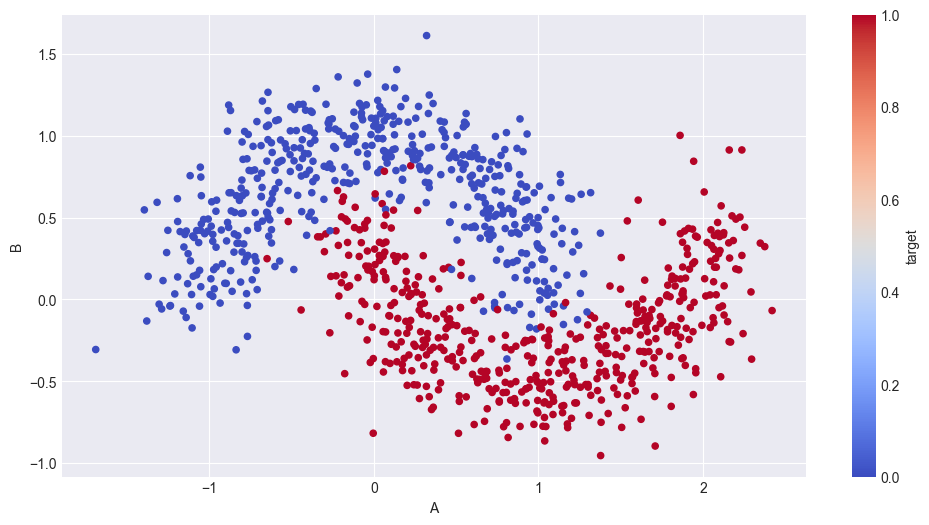

In [6]:
data_df = pd.DataFrame(X, columns=('A', 'B'))
data_df['target'] = y
display(data_df.head())
data_df.plot.scatter('A','B', c = 'target', cmap=CMAP)
display(y)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [8]:
# Sequential model. Classic neural network. Accepts pararmeters and instances as a list of inputs
input_dim = X_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_dim, 5), ## Input layer with 2 neurons(accepts only 5 columns)
    nn.ReLU(), # fully connected layers. Every neuron in this layer will be connected to every neuron in the next fully connected layer
    nn.Linear(5,5), 
    nn.ReLU(),
    nn.Linear(5,4), 
    nn.ReLU(),
    nn.Linear(4,3), 
    nn.ReLU(),
    nn.Linear(3,2)
).to(device=device)

In [9]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): ReLU()
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): ReLU()
  (8): Linear(in_features=3, out_features=2, bias=True)
)


In [10]:
# numpy array to tensor conversion. This is done to move the data to a gpu friendly format(still applicable to cpus also). Tensors are immutable, once they are set
train_X = torch.tensor(X_train, dtype=torch.float32, device=device)
train_y = torch.tensor(y_train, dtype=torch.int64, device=device)
test_X = torch.tensor(X_test, dtype=torch.float32, device=device)
test_y = torch.tensor(y_test, dtype=torch.int64, device=device)


In [11]:
train_X

tensor([[ 2.1581, -0.2587],
        [-0.2726,  1.0721],
        [-1.0524,  0.4215],
        ...,
        [ 1.0922, -0.6233],
        [ 0.7624, -0.4503],
        [ 0.9277,  0.1778]])

In [12]:
from torchsummary import summary
summary(model, input_size=(2,X_train.shape[0],X_train.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 2, 800, 5]              15
              ReLU-2            [-1, 2, 800, 5]               0
            Linear-3            [-1, 2, 800, 5]              30
              ReLU-4            [-1, 2, 800, 5]               0
            Linear-5            [-1, 2, 800, 4]              24
              ReLU-6            [-1, 2, 800, 4]               0
            Linear-7            [-1, 2, 800, 3]              15
              ReLU-8            [-1, 2, 800, 3]               0
            Linear-9            [-1, 2, 800, 2]               8
Total params: 92
Trainable params: 92
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.44
Params size (MB): 0.00
Estimated Total Size (MB): 0.45
-----------------------------------------------------

In [13]:
# loss function definition and training the model
# this is the model.compile equivalent of tf
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=ALPHA)
# some lists to collect progress
loss = []
tloss = []
n_epoch = []
acc = []
tacc = []

# this part is the model.fit equivalent of tf
for epoch in range(EPOCH):
    model.train()
    predict_proba = model(train_X)
    curr_loss = loss_fn(predict_proba, train_y)
    # backpropagation
    optimizer.zero_grad() # deletes any previous gradients which are accumulated from the previous loops
    curr_loss.backward() # backward pass. Computes the gradients that populate the .grad attribute of the parameters
    optimizer.step() # updates the models parameters

    loss.append(curr_loss.data.item())
    _, y_pred = torch.max(predict_proba, 1)
    curr_acc = accuracy_score(train_y.cpu().numpy(), y_pred.data.cpu())
    acc.append(curr_acc)

    model.eval()
    test_proba = model(test_X)
    test_loss = loss_fn(test_proba, test_y)
    tloss.append(test_loss.data.item())

    y_pred = torch.argmax(test_proba, dim=1).cpu().numpy()
    test_acc = accuracy_score(test_y.cpu().numpy(), y_pred)
    tacc. append(test_acc)
    n_epoch.append(epoch)

    print(f'Epoch {epoch+1}/{EPOCH}, Loss: {curr_loss.item()}, Accuracy: {curr_acc} / {test_acc}')

Epoch 1/6000, Loss: 0.7075086236000061, Accuracy: 0.5 / 0.5
Epoch 2/6000, Loss: 0.7071902751922607, Accuracy: 0.5 / 0.5
Epoch 3/6000, Loss: 0.7068769335746765, Accuracy: 0.5 / 0.5
Epoch 4/6000, Loss: 0.7065685987472534, Accuracy: 0.5 / 0.5
Epoch 5/6000, Loss: 0.7062652707099915, Accuracy: 0.5 / 0.5
Epoch 6/6000, Loss: 0.7059666514396667, Accuracy: 0.5 / 0.5
Epoch 7/6000, Loss: 0.7056729197502136, Accuracy: 0.5 / 0.5
Epoch 8/6000, Loss: 0.7053840756416321, Accuracy: 0.5 / 0.5
Epoch 9/6000, Loss: 0.7051001787185669, Accuracy: 0.5 / 0.5
Epoch 10/6000, Loss: 0.7048212289810181, Accuracy: 0.5 / 0.5
Epoch 11/6000, Loss: 0.7045474052429199, Accuracy: 0.5 / 0.5
Epoch 12/6000, Loss: 0.7042784094810486, Accuracy: 0.5 / 0.5
Epoch 13/6000, Loss: 0.7040143609046936, Accuracy: 0.5 / 0.5
Epoch 14/6000, Loss: 0.7037551999092102, Accuracy: 0.5 / 0.5
Epoch 15/6000, Loss: 0.7035006880760193, Accuracy: 0.5 / 0.5
Epoch 16/6000, Loss: 0.7032509446144104, Accuracy: 0.5 / 0.5
Epoch 17/6000, Loss: 0.7030060291

In [14]:
output = model(train_X)
y_pred = torch.argmax(output, dim=1).cpu().numpy() # argmax col to be moved to the cpu and then converted to a numpy array
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [15]:
from sklearn.metrics import classification_report
# move the tensor train_y to cpu if it exists on the gpu
print(classification_report(train_y.cpu().numpy(), y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.98      0.98      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [16]:
hist_df = pd.DataFrame({'epoch':n_epoch,
                       'loss':loss, 
                       'test_loss':tloss,
                       'acc':acc,
                       'test_acc':tacc})
hist_df

,epoch,loss,test_loss,acc,test_acc
0,0,0.71,0.71,0.50,0.50
1,1,0.71,0.71,0.50,0.50
2,2,0.71,0.71,0.50,0.50
3,3,0.71,0.71,0.50,0.50
4,4,0.71,0.71,0.50,0.50
...,...,...,...,...,...
5995,5995,0.05,0.11,0.98,0.97
5996,5996,0.05,0.11,0.98,0.97
5997,5997,0.05,0.11,0.98,0.97
5998,5998,0.05,0.11,0.98,0.97


<Axes: xlabel='epoch'>

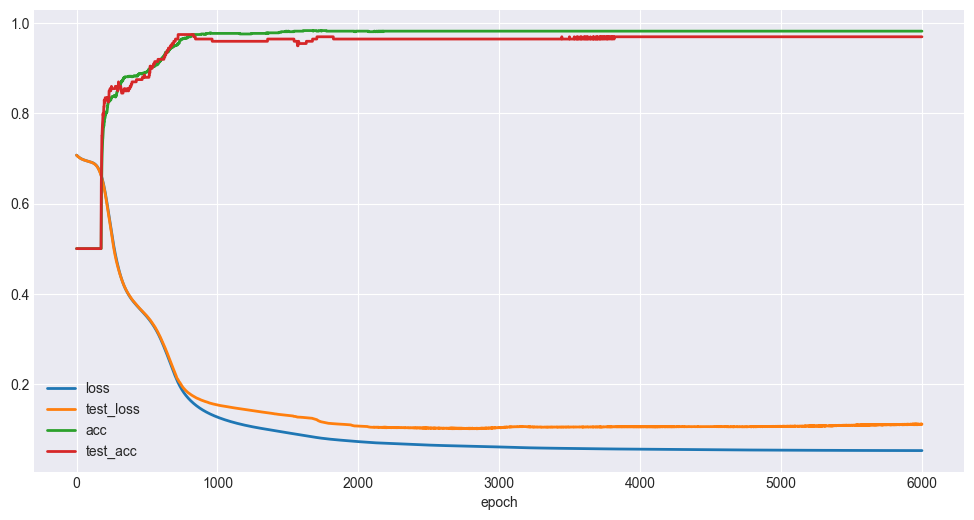

In [17]:
hist_df.plot(x='epoch', y=['loss', 'test_loss', 'acc', 'test_acc'])